In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data insights

## Based on the following data my aim is to get the following insights from visualisation:

* Male or female analysis (which product is each gender more likely to buy and the price they are willing to spend)
* Age analysis (same as gender analysis, which age groups are likely to spend more)
* Postcode district analysis (which place is most profitable)
* Sales analysis (which product is most profitable)

In [2]:
#import adtaset

df = pd.read_excel('cricket.xlsx')
#df

In [3]:
df.head(2).T

,0,1
contact_id,2645,5584
Contact Title,MR,MR
DoB,1955-05-28 00:00:00,1949-11-17 00:00:00
Postcode,DE1 1GN,S40 4ET
Postcode district,Derby,Sheffield
UK Region,East Midlands,East Midlands
tic or Mem No.,52653,52651
Product Name,Club Membership,Country Senior Member
Product Group,Club Membership,Club Membership
Season,2016,2016


In [4]:
df.count()

contact_id              314599
Contact Title           253826
DoB                     200278
Postcode                310600
Postcode district       299655
UK Region               299655
tic or Mem No.          314599
Product Name            314599
Product Group           314599
Season                  314599
Quantity post refund    314599
Quantity                314599
Price post refund       314599
Price                   314599
SaleDate                314599
Performance Date        314599
End Date (mem)          217543
Refunded                 55596
RefundDate               55416
EventType               314599
WebTransactionNumber    314599
TransactionNumber       314598
dtype: int64

In [5]:
df.nunique()

contact_id               28413
Contact Title               86
DoB                      12849
Postcode                 17453
Postcode district          112
UK Region                   13
tic or Mem No.          314596
Product Name               283
Product Group               21
Season                       6
Quantity post refund         2
Quantity                     1
Price post refund          142
Price                      146
SaleDate                  1912
Performance Date           275
End Date (mem)             200
Refunded                     1
RefundDate                 800
EventType                   22
WebTransactionNumber     30626
TransactionNumber        64348
dtype: int64

In [6]:
df.isnull().sum()

contact_id                   0
Contact Title            60773
DoB                     114321
Postcode                  3999
Postcode district        14944
UK Region                14944
tic or Mem No.               0
Product Name                 0
Product Group                0
Season                       0
Quantity post refund         0
Quantity                     0
Price post refund            0
Price                        0
SaleDate                     0
Performance Date             0
End Date (mem)           97056
Refunded                259003
RefundDate              259183
EventType                    0
WebTransactionNumber         0
TransactionNumber            1
dtype: int64

In [7]:
print(df. columns) 

Index(['contact_id', 'Contact Title', 'DoB', 'Postcode', 'Postcode district',
       'UK Region', 'tic or Mem No.', 'Product Name', 'Product Group',
       'Season', 'Quantity post refund', 'Quantity', 'Price post refund',
       'Price', 'SaleDate', 'Performance Date', 'End Date (mem)', 'Refunded',
       'RefundDate', 'EventType', 'WebTransactionNumber', 'TransactionNumber'],
      dtype='object')


In [8]:
df=df.drop(columns=['tic or Mem No.', 'WebTransactionNumber', 'TransactionNumber', 'Refunded', 'RefundDate'])

In [9]:
df = df.rename(columns = {"Contact Title": "contact_title",
                          "Postcode district": "postcode_district", 
                          "UK Region": "UK_region", 
                          "Product Name": "product_name", 
                          "Product Group": "product_group", 
                          "Quantity post refund": "quantity_post_refund", 
                          "Price post refund": "price_post_refund", 
                          "Performance Date": "performance_date", 
                          "End Date (mem)": "end_date"})   

In [10]:
df.head(10)

,contact_id,contact_title,DoB,Postcode,postcode_district,UK_region,product_name,product_group,Season,quantity_post_refund,Quantity,price_post_refund,Price,SaleDate,performance_date,end_date,EventType
0,2645,MR,1955-05-28,DE1 1GN,Derby,East Midlands,Club Membership,Club Membership,2016,1,1,190.0,190.0,2015-09-22,2015-09-01,2016-08-30,Memberships
1,5584,MR,1949-11-17,S40 4ET,Sheffield,East Midlands,Country Senior Member,Club Membership,2016,1,1,145.0,145.0,2015-09-22,2015-09-01,2016-08-30,Memberships
2,5584,MR,1949-11-17,S40 4ET,Sheffield,East Midlands,Car Park Pass,Parking,2016,1,1,60.0,60.0,2015-09-22,2015-09-01,2016-08-30,Memberships
3,5585,MRS,1948-06-21,S40 4ET,Sheffield,East Midlands,Country Senior Member,Club Membership,2016,1,1,145.0,145.0,2015-09-22,2015-09-01,2016-08-30,Memberships
4,16811,MR,1949-12-07,DE56 0DX,Derby,East Midlands,Car Park Pass,Parking,2016,1,1,60.0,60.0,2015-09-23,2015-09-01,2016-08-30,Memberships
5,16811,MR,1949-12-07,DE56 0DX,Derby,East Midlands,Senior Member,Club Membership,2016,1,1,165.0,165.0,2015-09-23,2015-09-01,2016-08-30,Memberships
6,19001,MR,1952-06-29,S40 1RZ,Sheffield,East Midlands,Car Park Pass,Parking,2016,1,1,60.0,60.0,2015-09-23,2015-09-01,2016-08-30,Memberships
7,24218,MR,1949-12-16,ST3 1AX,Stoke on Trent,West Midlands,Country Senior Member,Club Membership,2016,1,1,145.0,145.0,2015-09-23,2015-09-01,2016-08-30,Memberships
8,25046,MR,1963-03-04,NG17 9LD,Nottingham,East Midlands,Car Park Pass,Parking,2016,1,1,60.0,60.0,2015-09-23,2015-09-01,2016-08-30,Memberships
9,25046,MR,1963-03-04,NG17 9LD,Nottingham,East Midlands,Country Member,Club Membership,2016,1,1,170.0,170.0,2015-09-23,2015-09-01,2016-08-30,Memberships


In [11]:
df.describe()

,contact_id,Season,quantity_post_refund,Quantity,price_post_refund,Price
count,314599.000000,314599.000000,314599.000000,314599.0,314599.000000,314599.000000
mean,29268.508085,2018.234359,0.823280,1.0,10.379081,12.787914
std,13816.055247,1.621568,0.381432,0.0,32.274486,36.888158
min,7.000000,2016.000000,0.000000,1.0,0.000000,0.000000
25%,16539.000000,2017.000000,1.000000,1.0,0.000000,0.000000
50%,28342.000000,2018.000000,1.000000,1.0,4.000000,5.000000
75%,37990.500000,2019.000000,1.000000,1.0,15.000000,16.000000
max,59479.000000,2021.000000,1.000000,1.0,4950.000000,4950.000000


# Gender analysis

In [12]:
#gender=df['contact_title']
#gender.unique().tolist()

In [13]:
#df_v=pd.DataFrame(df.query(['Contact Title != "MR"']))
#df_v
#penguins.query('(body_mass_g > 4000) or ((species == "Chinstrap") and (flipper_length_mm < 200)) ')
#f1 = df.query('contact_title == "MR", "MRS"')
#['filter_1'] = df.query('contact_title == "MR"')
#f['filter_2'] = df.query('contact_title == "MRS"')
#f['filter_3'] = df.query('contact_title == "SIR"')

#f['filter_final'] = df[['filter_1', 'filter_2', 'filter_3']].all(axis=1)
#f1= df.query(('contact_title == "MR"') and ('contact_title == "MRS"') and ('contact_title == "SIR"'))
#f_v

In [14]:
df1=pd.DataFrame(df.groupby(['contact_title']).sum()['Price'].reset_index())
df1.sort_values(by='Price', ascending=False)

,contact_title,Price
47,MR,2541934.30
39,MISS,436141.10
52,MRS,332046.15
55,MS,99270.60
17,DR,25227.10
...,...,...
26,LISSY,6.00
79,SR,6.00
10,CONSECTETU,6.00
45,MO,5.00


# Location/district analysis

## Postcode district

In [15]:
df2=pd.DataFrame(df.groupby(['postcode_district']).mean()['Price'].reset_index())
df2=df2.sort_values(by='Price', ascending=False)
df2.head(10)

,postcode_district,Price
31,Edinburgh,81.125000
41,Harrow,68.137931
95,Sutton,54.103448
32,Enfield,46.754717
49,Isle of Man,46.666667
33,Exeter,37.505051
0,Aberdeen,36.166667
85,Shrewsbury,34.900000
43,Hereford,34.619048
35,Galashiels,34.571429


In [16]:
df3=pd.DataFrame(df.groupby(['postcode_district']).sum()['Price'].reset_index())
df3=df3.sort_values(by='Price', ascending=False)
df3.head(10)

,postcode_district,Price
25,Derby,2789789.25
84,Sheffield,431942.30
71,Nottingham,166235.90
93,Stoke on Trent,71526.45
105,Walsall,59805.90
92,Stockport,44387.40
61,London,34067.20
3,Birmingham,32805.65
57,Leicester,31395.20
26,Doncaster,17988.75


In [17]:
count=df['postcode_district'].value_counts()
count

Derby             229899
Sheffield          29597
Nottingham         10268
Walsall             5088
Stoke on Trent      4467
                   ...  
Aberdeen               6
Falkirk                5
Torquay                4
Paisley                3
Kilmarnock             2
Name: postcode_district, Length: 112, dtype: int64

## UK Region

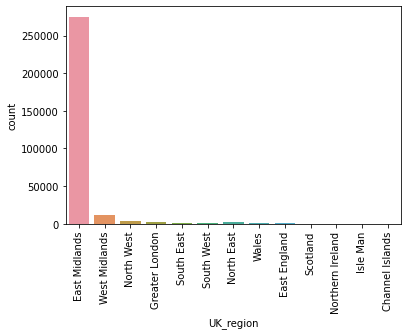

In [18]:
sns.countplot(x='UK_region',data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Price', ylabel='UK_region'>

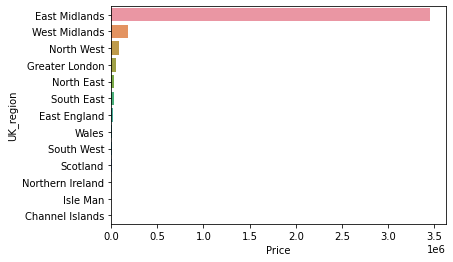

In [19]:
# UK region + price
df4=pd.DataFrame(df.groupby(['UK_region']).sum()['Price'].reset_index())
df4=df4.sort_values(by='Price', ascending=False)
df4
sns.barplot(x="Price", y="UK_region", data=df4)

<AxesSubplot:xlabel='Price', ylabel='UK_region'>

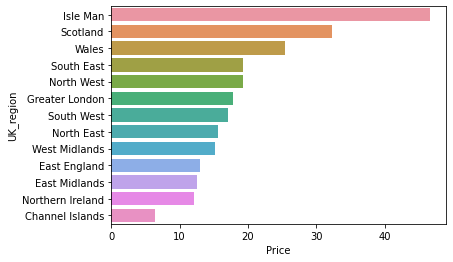

In [20]:
# UK region + price
df5=pd.DataFrame(df.groupby(['UK_region']).mean()['Price'].reset_index())
df5=df5.sort_values(by='Price', ascending=False)
df5
sns.barplot(x="Price", y="UK_region", data=df5)

# Product and sales analysis

## Product name

In [21]:
count2 = df['product_name'].value_counts()
count2.head(10)

Adult                     71292
Car Park On The Day       31083
Complimentary             22580
Adult On The Day LV/50    19580
Adult On The Day t20      16975
Adult Family               9703
Junior Family              9695
Junior On The Day          9690
Comp                       9188
Car Park                   8700
Name: product_name, dtype: int64

In [22]:
count2.tail(10)

ARC ENGINEER                1
BROADCAST SOLUTIONS         1
DCCC PHOTOGRAPHER           1
BENEVOLENT TRUST            1
JUNIOR 103                  1
Family Ticket On The Day    1
Baby Membership             1
CHAIRMAN ECB                1
Girls League Comp Ticket    1
DCCC STAFF                  1
Name: product_name, dtype: int64

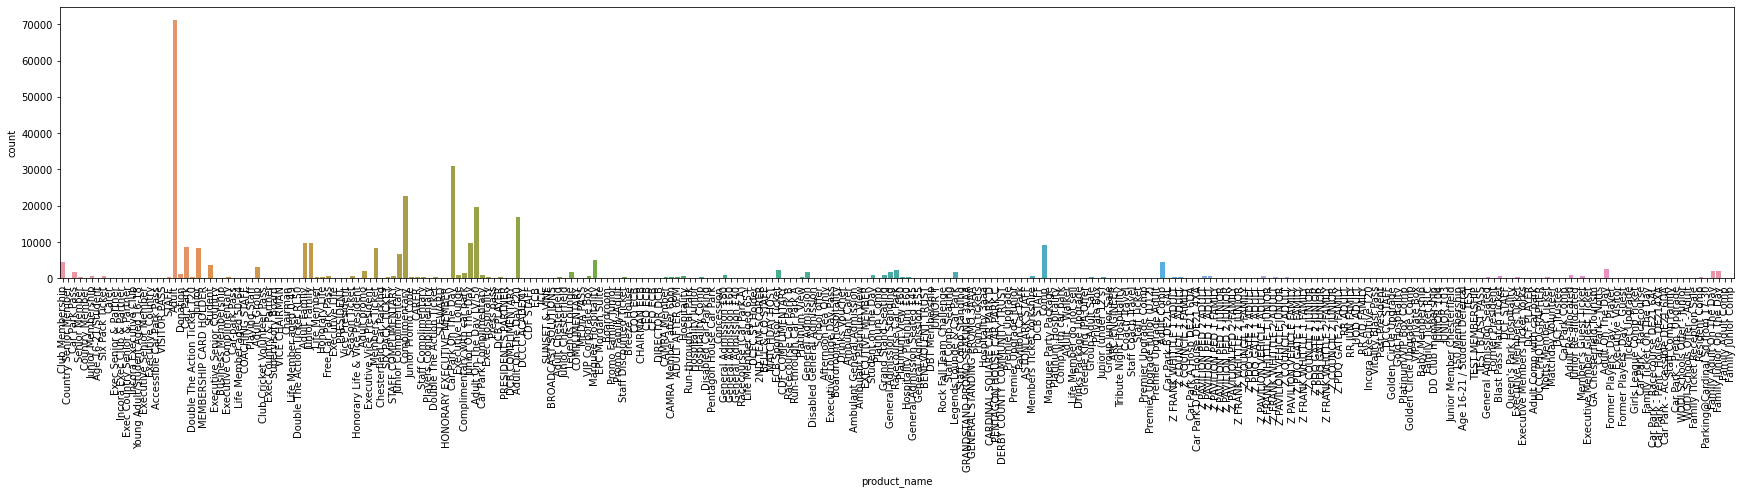

In [23]:
plt.figure(figsize=(30,5))
sns.countplot(x='product_name',data=df)
plt.xticks(rotation=90)
plt.show()

In [24]:
df6=pd.DataFrame(df.groupby(['product_name']).mean()['Price'].reset_index())
df6=df6.sort_values(by='Price', ascending=False)
df6.head(10)

,product_name,Price
173,Life Member aged 0-49,2763.800000
174,Life Member aged 50-64,1771.875000
175,Life Member aged 65+,1508.769231
105,Executive Life,873.529412
100,Exec Country Senior & Partner,645.000000
99,Exec Country & Partner,640.000000
102,Exec Senior & Partner,619.285714
112,Executive Senior Member,475.937500
104,Executive Country,470.000000
155,Incora Executive Club,457.279070


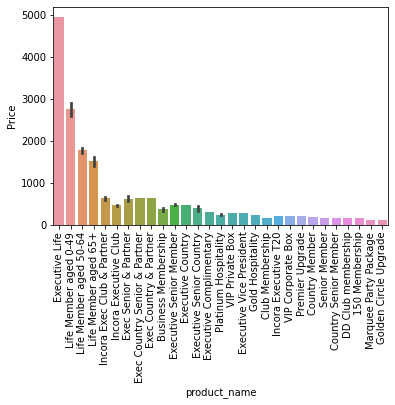

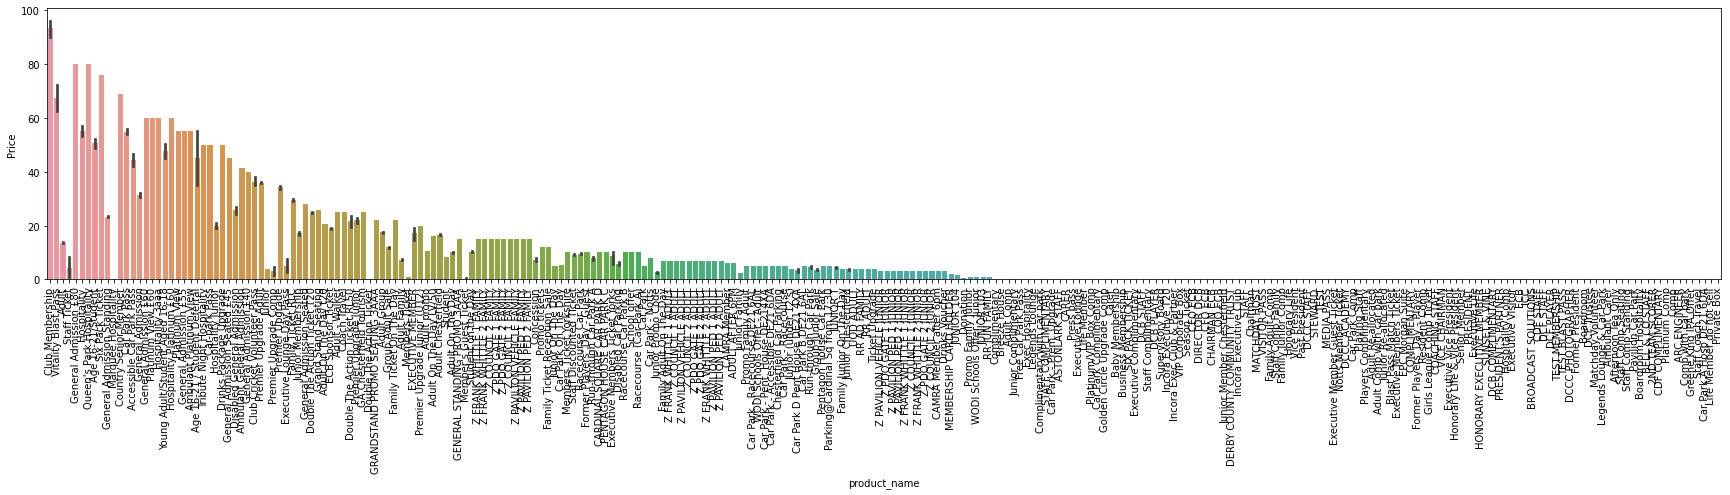

In [25]:
prices=df.query('Price > 100')
prices=prices.sort_values(by='Price', ascending=False)
sns.barplot(x='product_name', y='Price', data=prices )
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(30,5))
prices_2=df.query('Price < 100')
prices_2=prices_2.sort_values(by='Price', ascending=False)
sns.barplot(x='product_name', y='Price', data=prices_2)
plt.xticks(rotation=90)
plt.show()

## Product group

In [26]:
count3 = df['product_group'].value_counts()
count3

Adult Ticket             128728
Complimentary             49285
Parking                   46625
Family Ticket             24749
Junior Ticket             19815
Hospitality               13130
Members Ticket            11089
Club Membership            5859
Student Ticket             4616
Other                      3268
Player/Coach/Staff         2798
Blast Pass                 1415
Life Member                 998
Junior Membership           657
Promotion                   555
Incora Executive Club       452
Age 16-21/Student           262
Travel                      129
Business Membership          78
Golden Circle                58
VIP                          33
Name: product_group, dtype: int64

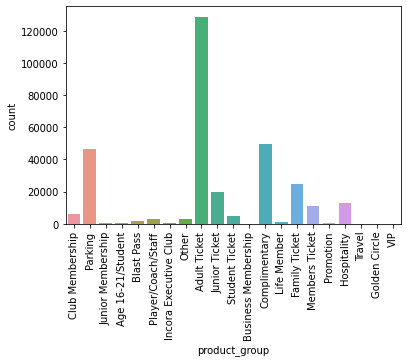

In [27]:
sns.countplot(x='product_group',data=df)
plt.xticks(rotation=90)
plt.show()

In [28]:
df4=pd.DataFrame(df.groupby(['product_group']).sum()['Price'].reset_index())
df4=df4.sort_values(by='Price', ascending=False)
df4
#sns.barplot(x="Price", y="product_group", data=df4)

,product_group,Price
0,Adult Ticket,2030688.80
4,Club Membership,800445.10
15,Parking,353510.00
8,Hospitality,151560.75
6,Family Ticket,138483.60
9,Incora Executive Club,134216.00
11,Junior Ticket,88350.65
12,Life Member,76633.00
2,Blast Pass,75337.20
5,Complimentary,45823.00


In [29]:
df4=pd.DataFrame(df.groupby(['product_group']).mean()['Price'].reset_index())
df4=df4.sort_values(by='Price', ascending=False)
df4

,product_group,Price
9,Incora Executive Club,296.938053
3,Business Membership,143.974359
20,VIP,138.181818
4,Club Membership,136.618041
7,Golden Circle,105.000000
12,Life Member,76.786573
2,Blast Pass,53.241837
1,Age 16-21/Student,50.278626
19,Travel,25.000000
10,Junior Membership,17.031963


## Season

In [30]:
# Volcano Type + Fatalities
df7=pd.DataFrame(df.groupby(['Season']).mean()['Price'].reset_index())
df7=df7.sort_values(by='Season', ascending=False)
df7

,Season,Price
5,2021,10.695498
4,2020,54.090127
3,2019,12.426282
2,2018,11.666679
1,2017,14.243481
0,2016,11.072805


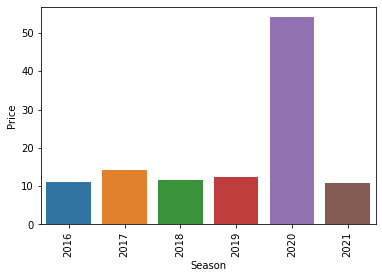

In [31]:
sns.barplot(y="Price", x="Season", data=df7)
plt.xticks(rotation=90)
plt.show()

In [32]:
count3 = df['Season'].value_counts()
count3

2019    75170
2018    68269
2017    58677
2016    54969
2021    52146
2020     5368
Name: Season, dtype: int64

# Another Analysis
- -----------------------------------------------------------------------------
- -----------------------------------------------------------------------------

# Product partial/full refund

In [33]:
df['quantity_post_refund'].value_counts()

1    259003
0     55596
Name: quantity_post_refund, dtype: int64

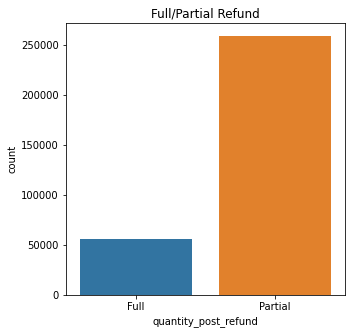

In [34]:
plt.figure(figsize=(5,5))
sns.countplot(df['quantity_post_refund'])
plt.xticks([0,1], ['Full','Partial'])
plt.title('Full/Partial Refund')
plt.show()

# top 20 Highest subscribed products in percentage

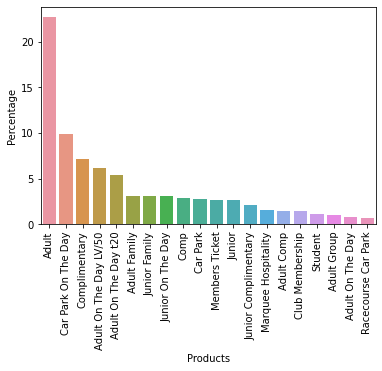

In [35]:
x = df['product_name'].value_counts(normalize=True)[:20]*100
sns.barplot(x=x.index,y=x)
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.xlabel('Products')
plt.show()

# Product Group and their percenatge Subscriptions

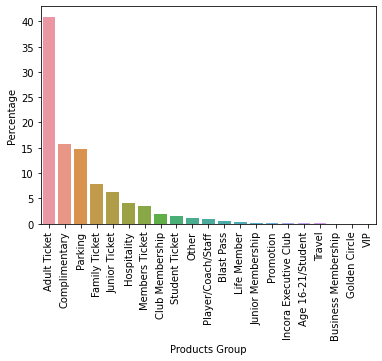

In [36]:
x = df['product_group'].value_counts(normalize=True)*100
sns.barplot(x=x.index,y=x)
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.xlabel('Products Group')
plt.show()

# Season wise product subscription

In [37]:
df[['product_name','Season','quantity_post_refund']].groupby(['Season','product_name']).count()

quantity_post_refund
Season product_name                                     
2016   ADULT AFTER 6PM                               300
       Accessible Car Park Pass                       12
       Adult                                        8654
       Adult Chesterfield                            280
       Adult Family                                 1764
...                                                  ...
2021   VISITOR PASS                                    9
       Vice President                                 17
       Vitality Blast Pass                           144
       WODI Schools Offer - Adult                      2
       WODI Schools Offer - Junior                    30

[644 rows x 1 columns]

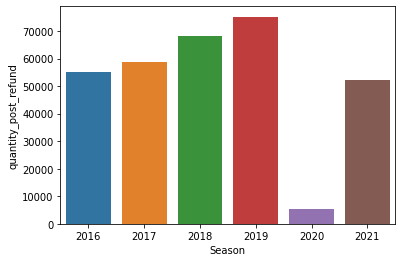

In [38]:
x = df[['Season','quantity_post_refund']].groupby(['Season']).count()
x.reset_index(inplace=True)
sns.barplot(x=x.Season,y=x.quantity_post_refund)
plt.show()

In [39]:
df.head()

,contact_id,contact_title,DoB,Postcode,postcode_district,UK_region,product_name,product_group,Season,quantity_post_refund,Quantity,price_post_refund,Price,SaleDate,performance_date,end_date,EventType
0,2645,MR,1955-05-28,DE1 1GN,Derby,East Midlands,Club Membership,Club Membership,2016,1,1,190.0,190.0,2015-09-22,2015-09-01,2016-08-30,Memberships
1,5584,MR,1949-11-17,S40 4ET,Sheffield,East Midlands,Country Senior Member,Club Membership,2016,1,1,145.0,145.0,2015-09-22,2015-09-01,2016-08-30,Memberships
2,5584,MR,1949-11-17,S40 4ET,Sheffield,East Midlands,Car Park Pass,Parking,2016,1,1,60.0,60.0,2015-09-22,2015-09-01,2016-08-30,Memberships
3,5585,MRS,1948-06-21,S40 4ET,Sheffield,East Midlands,Country Senior Member,Club Membership,2016,1,1,145.0,145.0,2015-09-22,2015-09-01,2016-08-30,Memberships
4,16811,MR,1949-12-07,DE56 0DX,Derby,East Midlands,Car Park Pass,Parking,2016,1,1,60.0,60.0,2015-09-23,2015-09-01,2016-08-30,Memberships


# Distribution of EventType

In [40]:
df['EventType'].value_counts()

Vitality Blast                     72095
NatWest T20 Blast                  55740
Music & Events                     54226
Specsavers County Championship     48212
Royal London One-Day Cup           14478
Memberships                        14298
Derbyshire County Cricket Club     14057
Tourist Match                       8057
Royal London Cup                    6968
NatWest T20 Blast QF                4227
County Championship/One Day Cup     4035
County Championship                 3513
Royal London ODI                    2576
Ladies International                2438
The 3aaa County Ground              2378
Bell & Co Tour Match                2348
Women's International               2225
Special Event                       1655
Cricket Derbyshire India Club        537
Women's Regional T20                 348
Sponsored Walk T202020               108
ASTON LARK                            80
Name: EventType, dtype: int64

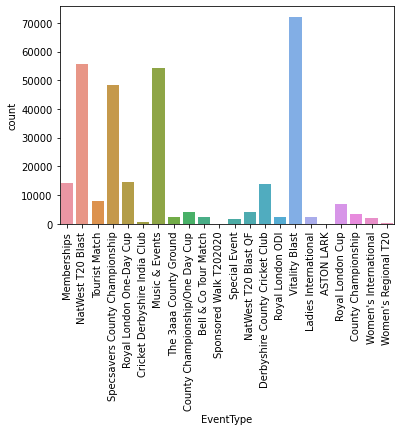

In [41]:
sns.countplot(df['EventType'])
plt.xticks(rotation=90)
plt.show()

# yearwise highest revenue generator product

In [42]:
y = df[['Season','product_name','price_post_refund']].groupby(['Season','product_name']).sum()

In [43]:
y.reset_index(inplace=True)
y.groupby(['Season']).max()

,product_name,price_post_refund
Season,,
2016,Young Adult/Student Aged 16-18,89678.0
2017,Young Adult/Student Aged 16-18,168330.0
2018,Vice President,176661.0
2019,Z PDQ GATE 2 JUNIOR,272466.8
2020,Vitality Blast Pass,102993.0
2021,WODI Schools Offer - Junior,101065.1


# Year wise lowest revenue generator product

In [44]:
y.groupby(['Season']).min()

,product_name,price_post_refund
Season,,
2016,ADULT AFTER 6PM,0.0
2017,2ND TEAM SCORER,0.0
2018,2ND TEAM SCORER,0.0
2019,2ND TEAM SCORER,0.0
2020,150 Membership,0.0
2021,ASTONLARK STAFF,0.0


# Yearwise revenue distribution among products

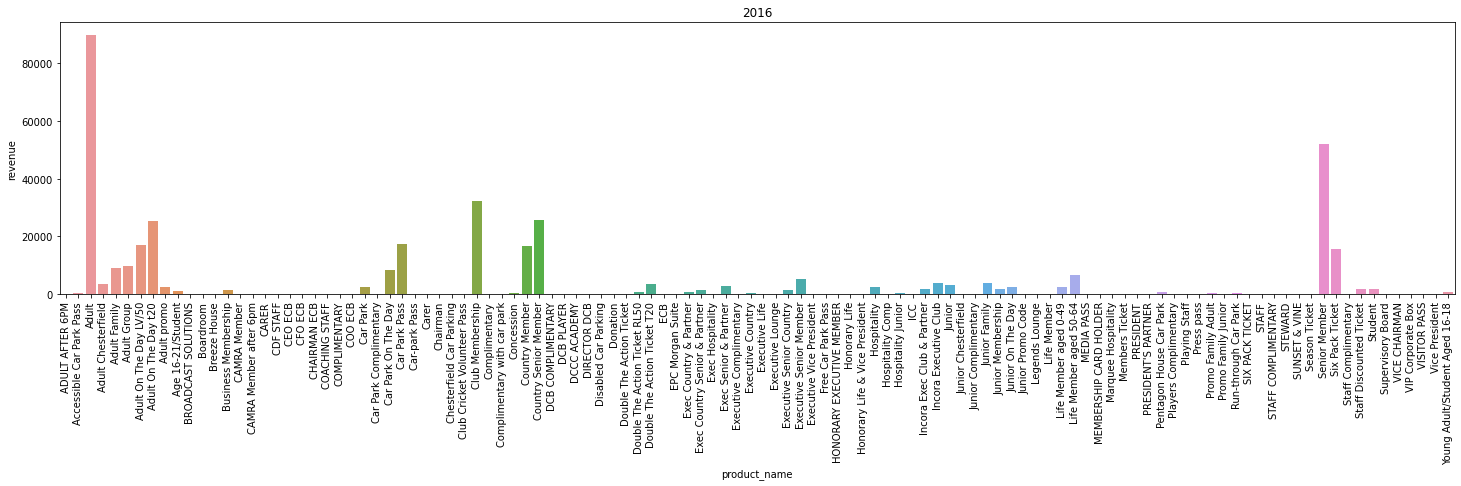

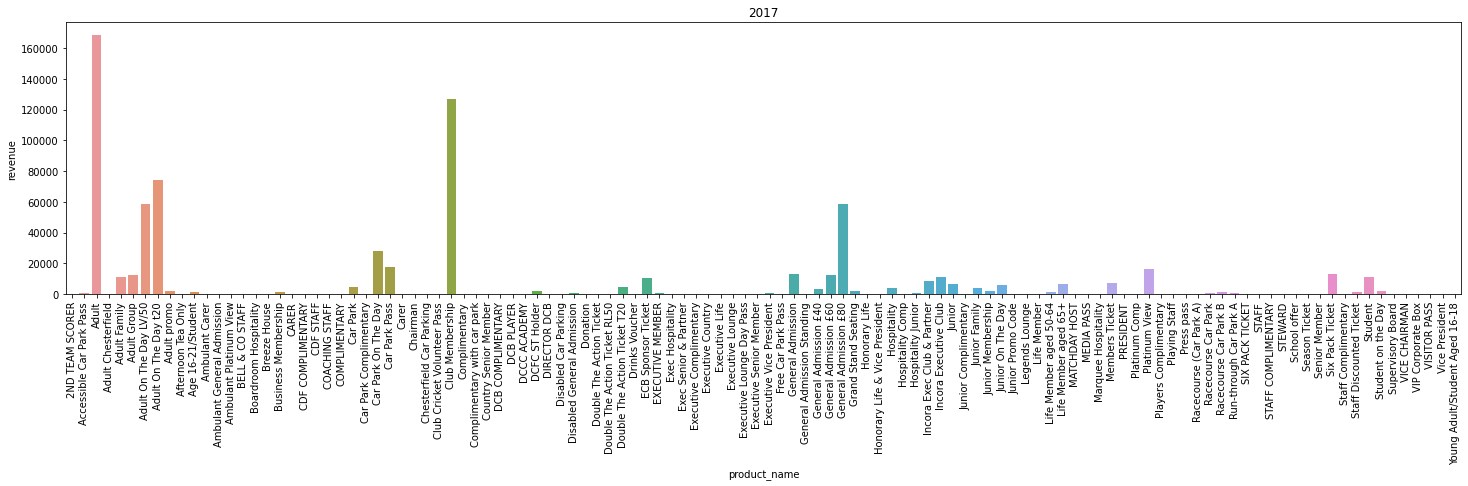

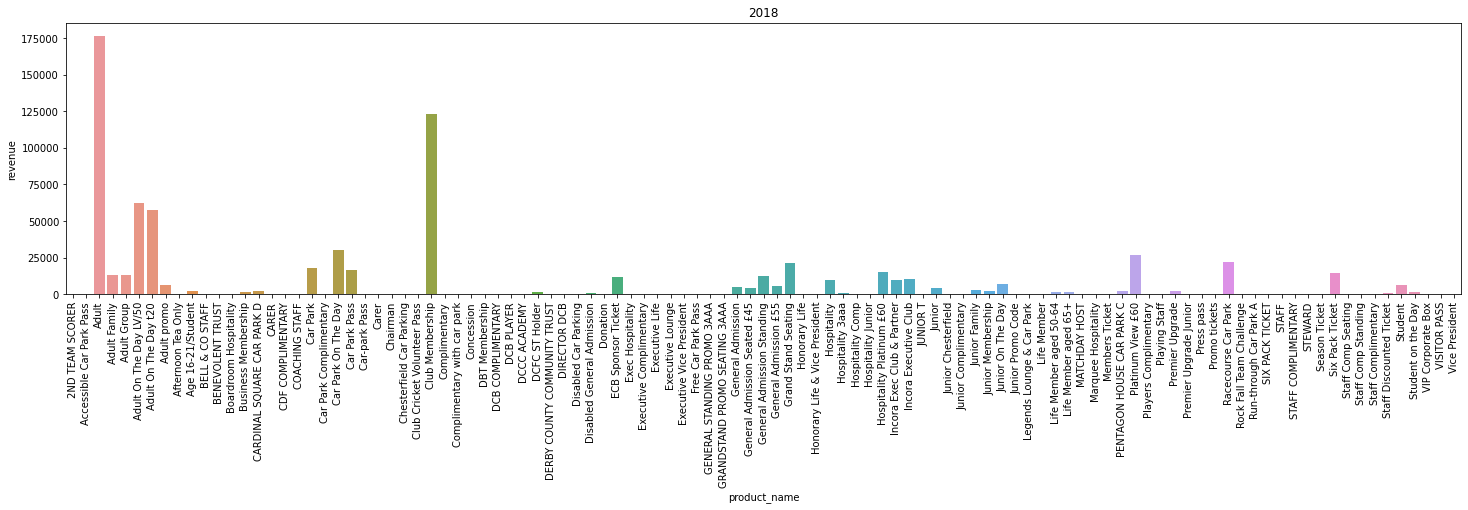

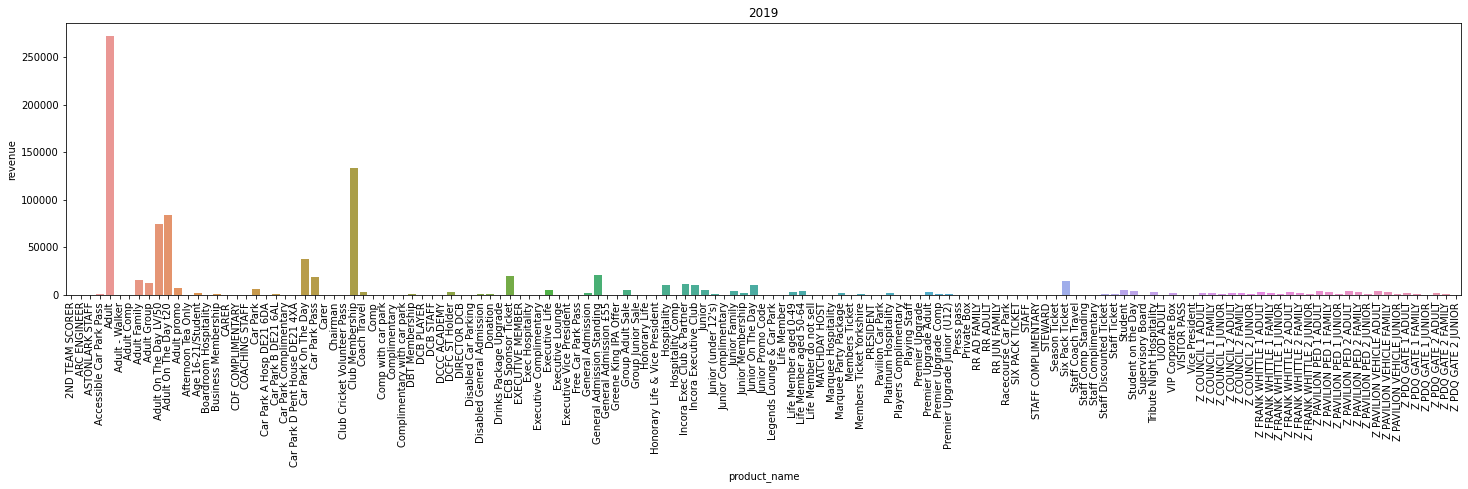

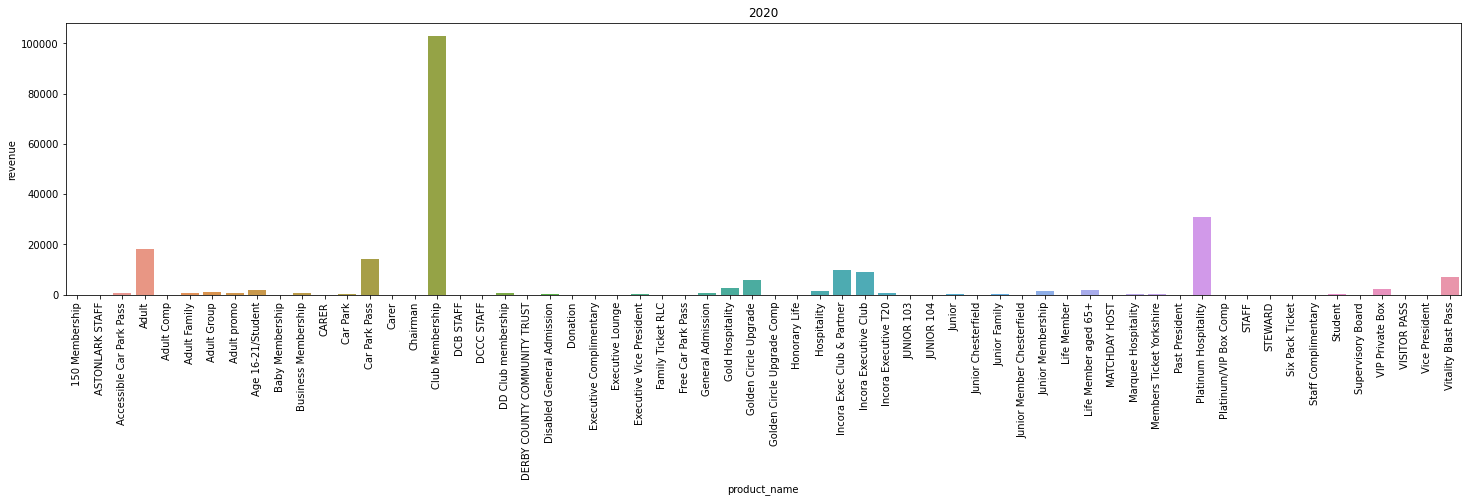

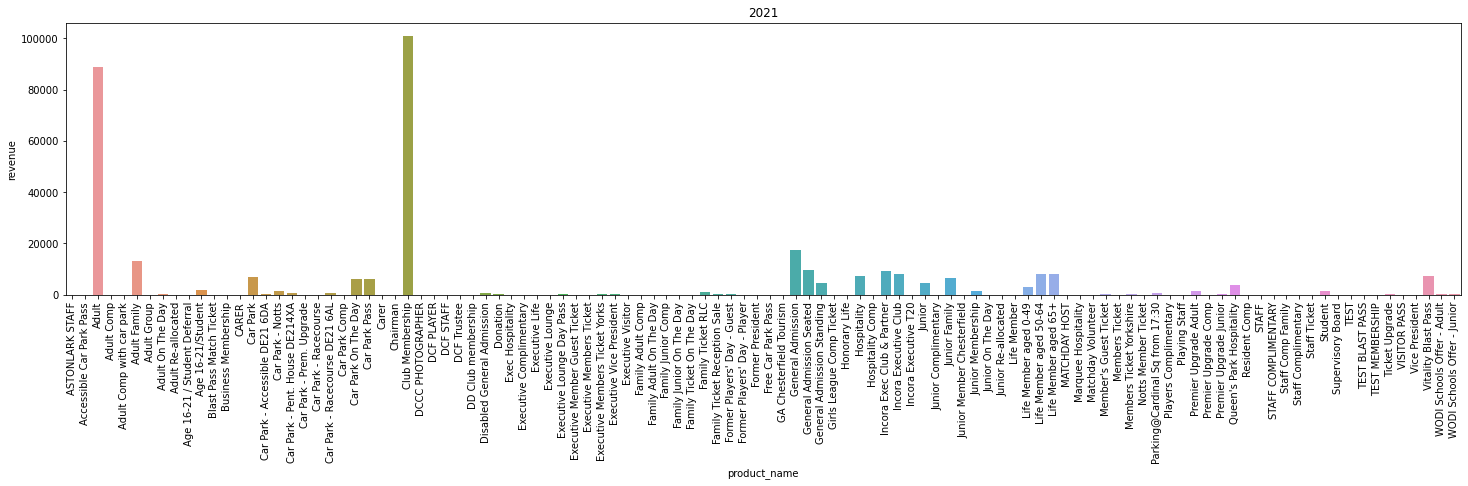

In [45]:
for year in set(y['Season']):
    plt.figure(figsize=(25,5))
    sns.barplot(x=y[y['Season']==year].product_name,y=y[y['Season']==year].price_post_refund)
    plt.title(str(year))
    plt.xticks(rotation=90)
    plt.ylabel('revenue')
    plt.show()

In [46]:
y

,Season,product_name,price_post_refund
0,2016,ADULT AFTER 6PM,12.0
1,2016,Accessible Car Park Pass,480.0
2,2016,Adult,89678.0
3,2016,Adult Chesterfield,3680.0
4,2016,Adult Family,9181.0
...,...,...,...
639,2021,VISITOR PASS,0.0
640,2021,Vice President,0.0
641,2021,Vitality Blast Pass,7191.2
642,2021,WODI Schools Offer - Adult,10.0


# Year wise total revenue

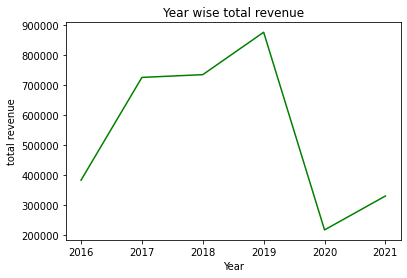

In [47]:
plt.plot(y.groupby('Season').sum(),color='g')
plt.title('Year wise total revenue')
plt.xlabel('Year')
plt.ylabel('total revenue')
plt.show()

# Year wise total product sold

In [48]:
t = df[(df['Quantity'] - df['quantity_post_refund']) != 0][['Season','Quantity']].groupby('Season').sum()

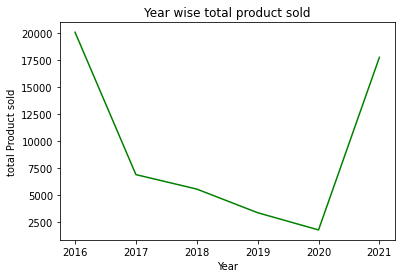

In [49]:
plt.plot(t,color='g')
plt.title('Year wise total product sold')
plt.xlabel('Year')
plt.ylabel('total Product sold')
plt.show()